# Spaceship Titanic 🚀

<div align="center">
    <img src='https://pic2.zhimg.com/v2-768b110090ef51c582c2f846adcb689a_r.jpg?source=172ae18b' style='height:100px;'>
</div>


## Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones 

## Aprendizaje Supervisado

**Grupo 5  
Integrantes:**

    Argüello, Leandro Ismael
    Corral, Diego
    Racciatti, Florencia
    Rinaudo, Eleana
    Romero, Ernesto

>#### Se busca realizar la prediccion de cuantos pasajeros fueron transportados a otra dimension cuando la nave accidentalmente ingreso a la anomalia espacio-temporal.

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
)
from sklearn.model_selection import (
    train_test_split,
    ParameterSampler,
    RandomizedSearchCV,
    ParameterGrid,
    GridSearchCV,
)

#### Carga de datos de train

In [82]:
train_url = r"C:\Users\ernes\OneDrive\Escritorio\Diplo\Aprendizaje_Supervizado\AprendizajeSupervisado\Práctico\train.csv"
train = pd.read_csv(train_url)
print(train.shape)
train.head()

(7823, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


In [83]:
train.Transported.value_counts()

1    3964
0    3859
Name: Transported, dtype: int64

_________________________________________________________

## Analisis de correlacion de las variables de 'train'.

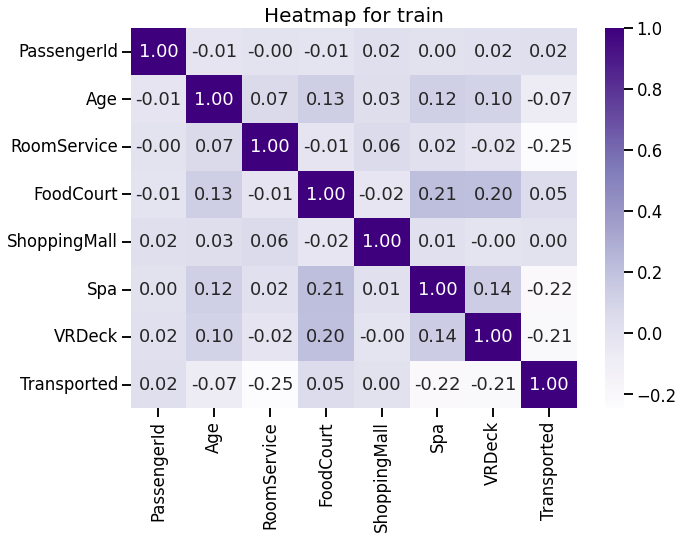

In [84]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(train.corr(), annot = True, fmt = ".2f", cmap = 'Purples')
plt.title('Heatmap for train', fontsize = 20)
plt.show()

>**Se observan ciertas correlaciones aunque nada demasiado significativo, un maximo de -0.25.**

## Observamos nulos y su porcentaje dentro de cada columna asi como en el total.

In [85]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, round(percent,3)], axis = 1, keys = ['Total_nuls_train', 'Percent'])
missing_data.style.background_gradient(subset = ["Percent"])

,Total_nuls_train,Percent
CryoSleep,196,0.025000
ShoppingMall,188,0.024000
Cabin,184,0.024000
VIP,184,0.024000
Name,184,0.024000
HomePlanet,179,0.023000
VRDeck,169,0.022000
Age,162,0.021000
Destination,160,0.020000
Spa,158,0.020000


In [86]:
total_nuls = missing_data.Total_nuls_train.sum()
perc_nuls = (total_nuls * 100)/len(train)
print(' Total de nulos en train: ',total_nuls,'\n Porcentaje de nulos en train: ',round(perc_nuls,2))

 Total de nulos en train:  2073 
 Porcentaje de nulos en train:  26.5


>**Basandonos en que el numero de datos nulos total representa un 26.5% del total d datos de train, es posible que tengamos que imputar datos.** 

## Analisis exploratorio de variables de 'train'.

In [87]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [88]:
train.dtypes

PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [89]:
plt.rcParams['figure.figsize'] = (7, 5)

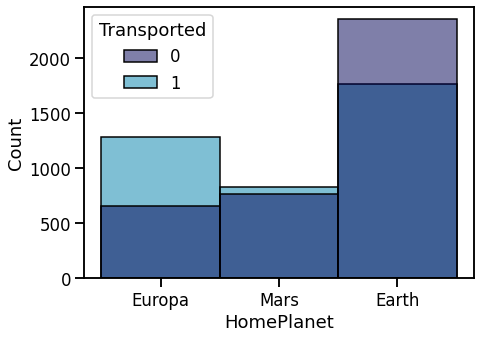

In [90]:
#Homeplanet
sns.histplot(data = train, x='HomePlanet',hue='Transported',palette='ocean');

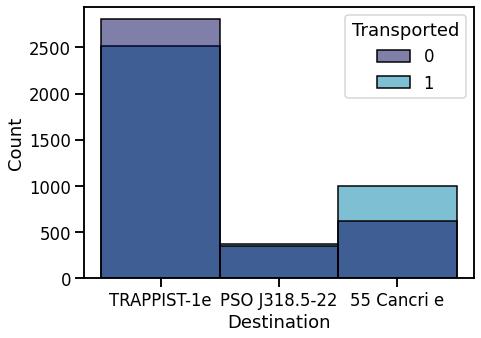

In [91]:
#Destination
sns.histplot(data = train, x='Destination',hue='Transported',palette='ocean');

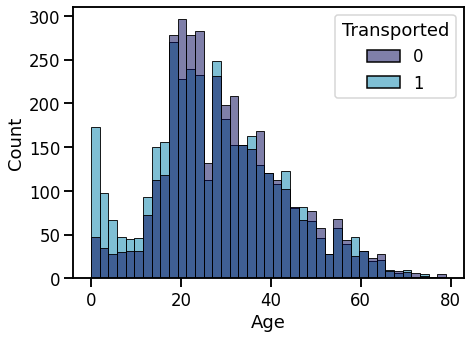

In [92]:
#Age
sns.histplot(data = train, x='Age',hue='Transported',palette='ocean');

In [93]:
#Cabin
train.Cabin.value_counts()

G/734/S     8
B/201/P     7
F/1194/P    7
E/13/S      7
G/117/S     6
           ..
B/120/P     1
G/6/S       1
G/80/S      1
G/631/S     1
E/253/P     1
Name: Cabin, Length: 6009, dtype: int64

## Analisis descriptivo de variables que no seran graficadas.  
> Las variables **CryoSleep** y **VIP** son de tipo booleano.  
> La variable **Cabin** representa el numero de cabina con el detalle de si es en babor(P) o estribor(S).  
> La variable **Name** representa el nombre completo del pasajero.  
> La variable **PassengerId** representa el id del pasajero.  

**Analisis de variables referidas al monto que el pasajero ha facturado en cada uno de los muchos servicios de lujo del Spaceship Titanic.**

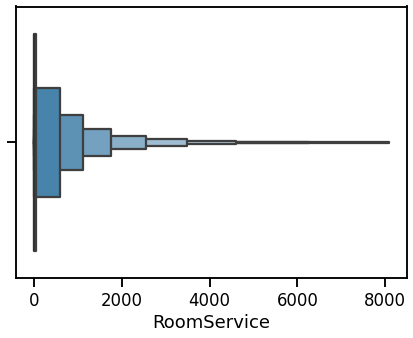

In [94]:
sns.boxenplot(train.RoomService,showfliers=False);

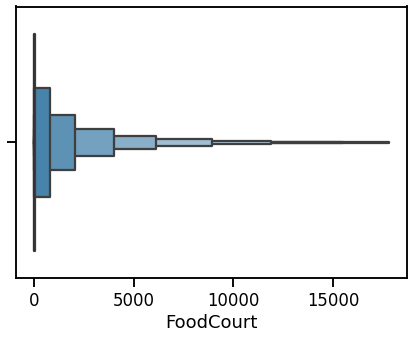

In [95]:
sns.boxenplot(train.FoodCourt,showfliers=False);

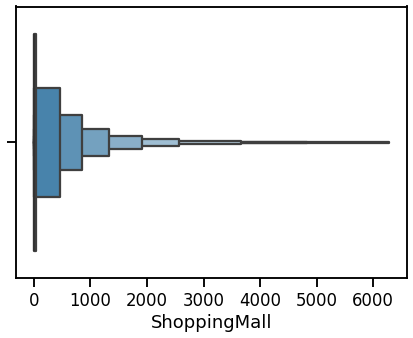

In [96]:
sns.boxenplot(train.ShoppingMall,showfliers=False);

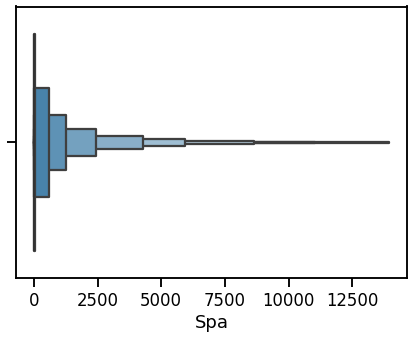

In [97]:
sns.boxenplot(train.Spa,showfliers=False);

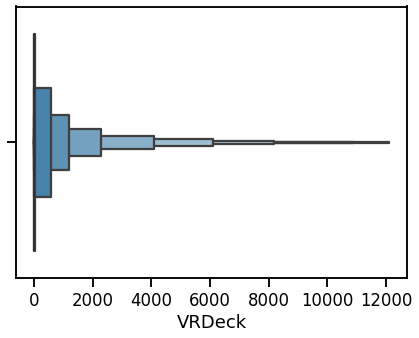

In [98]:
sns.boxenplot(train.VRDeck ,showfliers=False);

## Algunas observaciones


>*A partir de las observaciones realizadas sobre los datos, podemos decir que las variables correspondientes al grupo de Servicios de lujo del Spaceship Titanic, contiene datos un poco desbalanceados con Outliers.  
>*A demas las variables **CryoSleep** y **VIP** son del tipo booleano, por lo cual probablemente deban descartarse o ser reemplazadas por valores numericos como 0 y 1.  
>*Las columnas categoricas Homeplanet y Destination aportan una posible clasificacion del target.  
>*La columna Cabin puede ser usada para generar nuevas features.


## Posibles acciones
  
>*Usar metodo de imputacion de valores faltantes a los nulos de cada variable.  
*Probar una limpieza de outliers de las columnas de montos en lujos.  
*Codificar las variables categoricas.  
*Con respecto a las dos variables tipo boolean, ver si combiene codificarlas o transformarlas en 0 y 1.  
*elegir columnas a excluir como por Name y PassengerId.  

__________

____________

### Columnas elegidas para el analisis en 'Train'.

Creemos que las siguientes columnas aportan informacion util para la clasificacion y caracterizacion de los pasajeros en el analisis del problema.  
**Columnas elegidas:**

In [99]:
['HomePlanet','CryoSleep','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Cabin']

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin']

Columnas eliminadas debido a que contienen datos que son unicos o keys.

In [100]:
train = train.drop(columns = ['Name','PassengerId'])

In [101]:
train.shape

(7823, 12)

### Tratamiento de la variable 'Cabin' y generacion de nuevas features en 'Train'.

In [102]:
train['Cabin']

0        C/123/P
1        F/126/S
2        B/343/S
3       F/1420/P
4          G/9/P
          ...   
7818    F/1319/S
7819     G/459/S
7820    F/1772/P
7821     E/253/P
7822     B/270/P
Name: Cabin, Length: 7823, dtype: object

In [103]:
new_features = train['Cabin'].str.split(pat="/",expand=True)

In [104]:
new_features = new_features.rename(columns={0:'Deck_of_spaceship',1:'Number_of_cabin',2:'Port_or_Starboard'})
new_features.head()

,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,C,123,P
1,F,126,S
2,B,343,S
3,F,1420,P
4,G,9,P


In [105]:
#Eliminamos la columna 'Cabin' ya que las nuevas features aportan informacion con mas peso.
train = train.drop(columns='Cabin')

In [106]:
train = train.join(new_features, lsuffix='_caller', rsuffix='_other')
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P
1,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S
2,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343,S
3,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P
4,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P


Nuevas features Agregadas:  
>Deck_of_spaceship : Cubierta  
>Number_of_cabin   : Numero de Cabina  
>Port_or_Starboard : S=Babor, P=Estribor  


_________

# Imputacion de valores nulos en 'Train' para las columnas numericas.

In [107]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, round(percent,3)], axis = 1, keys = ['Total_nulls_test', 'Percent'])
missing_data.style.bar(subset = ["Percent"], 
             color = "lightblue", 
             vmin = 0)

,Total_nulls_test,Percent
CryoSleep,196,0.025000
ShoppingMall,188,0.024000
VIP,184,0.024000
Deck_of_spaceship,184,0.024000
Number_of_cabin,184,0.024000
Port_or_Starboard,184,0.024000
HomePlanet,179,0.023000
VRDeck,169,0.022000
Age,162,0.021000
Destination,160,0.020000


In [108]:
train.dtypes

HomePlanet            object
CryoSleep             object
Destination           object
Age                  float64
VIP                   object
RoomService          float64
FoodCourt            float64
ShoppingMall         float64
Spa                  float64
VRDeck               float64
Transported            int64
Deck_of_spaceship     object
Number_of_cabin       object
Port_or_Starboard     object
dtype: object

In [109]:
cat_cols = ['HomePlanet','CryoSleep','Destination','VIP','Deck_of_spaceship','Port_or_Starboard']
num_cols = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Number_of_cabin']

### Utilizando IterativeImputer imputamos valores faltantes de las columnas numericas de 'Train'.

In [110]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [111]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

train["Age"] = StandardScaler().fit_transform(
    train[["Age"]]
)
train["FoodCourt"] = StandardScaler().fit_transform(
    train[["FoodCourt"]]
)
train["RoomService"] = StandardScaler().fit_transform(
    train[["RoomService"]]
)
train["ShoppingMall"] = StandardScaler().fit_transform(
    train[["ShoppingMall"]]
)
train["Spa"] = StandardScaler().fit_transform(
    train[["Spa"]]
)
train["VRDeck"] = StandardScaler().fit_transform(
    train[["VRDeck"]]
)
train["Number_of_cabin"] = StandardScaler().fit_transform(
    train[["Number_of_cabin"]]
)
train[
    ["Age", "FoodCourt","RoomService","ShoppingMall","Spa","VRDeck","Number_of_cabin"]
] = mice_imputer.fit_transform(train[["Age", "FoodCourt","RoomService","ShoppingMall","Spa","VRDeck",
                                                   "Number_of_cabin"]])

In [112]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, round(percent,3)], axis = 1, keys = ['Total_nulls_train', 'Percent'])
missing_data.style.bar(subset = ["Percent"], 
             color = "lightgreen", 
             vmin = 0)

,Total_nulls_train,Percent
CryoSleep,196,0.025000
VIP,184,0.024000
Deck_of_spaceship,184,0.024000
Port_or_Starboard,184,0.024000
HomePlanet,179,0.023000
Destination,160,0.020000
Age,0,0.000000
RoomService,0,0.000000
FoodCourt,0,0.000000
ShoppingMall,0,0.000000


>'Train' quedo sin valores nulos.

In [113]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,False,TRAPPIST-1e,1.944636,False,-0.332891,2.099303,-0.266942,-0.097078,3.272797,0,C,-0.929337,P
1,Mars,True,NaN,-0.752347,False,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,1,F,-0.923471,S
2,Europa,True,TRAPPIST-1e,0.284954,NaN,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,1,B,-0.499119,S
3,Earth,False,TRAPPIST-1e,0.976488,False,-0.123802,0.464079,-0.288685,-0.269134,-0.083662,0,F,1.606993,P
4,Earth,False,TRAPPIST-1e,-0.683193,False,-0.332891,-0.281056,0.831932,-0.268252,-0.239138,0,G,-1.152268,P


In [114]:
y = train.Transported
X = train.drop('Transported',axis=1)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,Europa,False,TRAPPIST-1e,1.944636,False,-0.332891,2.099303,-0.266942,-0.097078,3.272797,C,-0.929337,P
1,Mars,True,NaN,-0.752347,False,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,F,-0.923471,S
2,Europa,True,TRAPPIST-1e,0.284954,NaN,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233,B,-0.499119,S
3,Earth,False,TRAPPIST-1e,0.976488,False,-0.123802,0.464079,-0.288685,-0.269134,-0.083662,F,1.606993,P
4,Earth,False,TRAPPIST-1e,-0.683193,False,-0.332891,-0.281056,0.831932,-0.268252,-0.239138,G,-1.152268,P


### Usamos LabelEncoder para las columnas categoricas y escalamos

In [115]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_cols = cat_cols

for col in label_cols:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

### Usamos StandardScaler para escalar los datos.

In [116]:
x_names = X.columns
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=x_names)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck_of_spaceship,Number_of_cabin,Port_or_Starboard
0,0.320042,-0.746493,0.579856,1.960248,-0.209979,-0.334156,2.118173,-0.268919,-0.096627,3.299609,-1.289174,-0.934458,-0.989092
1,1.478619,1.108595,1.769839,-0.755722,-0.209979,-0.334156,-0.282150,-0.290874,-0.270164,-0.271107,0.333634,-0.928546,0.850144
2,0.320042,1.108595,0.579856,0.288882,5.752517,-0.334156,-0.282150,-0.290874,-0.270164,-0.271107,-1.830110,-0.500913,0.850144
3,-0.838536,-0.746493,0.579856,0.985284,-0.209979,-0.123370,0.469234,-0.290874,-0.270164,-0.083078,0.333634,1.621486,-0.989092
4,-0.838536,-0.746493,0.579856,-0.686082,-0.209979,-0.334156,-0.282150,0.840622,-0.269275,-0.239769,0.874570,-1.159113,-0.989092


### Dividimos en conjuntos de train y test.

In [117]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state = 0 ) 

________________

In [118]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


clfs =  [DecisionTreeClassifier(),
        RandomForestClassifier(),
        LogisticRegression(),
        MLPClassifier(),
        XGBClassifier(),
        GaussianNB(),
        LinearSVC(),
        ]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM',
        ]

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)

Arbol de decisión
Accuracy train Arbol de decisión: 99.96%
Accuracy test Arbol de decisión: 77.14%
Random Forest
Accuracy train Random Forest: 99.96%
Accuracy test Random Forest: 81.74%
Regresión Logística
Accuracy train Regresión Logística: 78.74%
Accuracy test Regresión Logística: 80.84%
Perceptrón multicapa
Accuracy train Perceptrón multicapa: 83.20%
Accuracy test Perceptrón multicapa: 82.63%
XGBoost
Accuracy train XGBoost: 92.86%
Accuracy test XGBoost: 80.97%
Naive Bayes
Accuracy train Naive Bayes: 70.43%
Accuracy test Naive Bayes: 72.80%
SVM
Accuracy train SVM: 78.47%
Accuracy test SVM: 80.08%


## XG BOOST

In [119]:
import xgboost as xgb

In [120]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state = 0)

binary:hinge: hinge loss for binary classification. This makes predictions of 0 or 1, rather than producing probabilities.
Parametros:
n_estimators (int) – Number of boosting rounds.
max_depth 

In [121]:
clf_xgb = xgb.XGBClassifier(objective= 'binary:hinge',
                            n_estimators= 29,
                            max_leaves= 60,
                            max_depth= 6,
                            random_state = 1, 
                            tree_method= 'approx'
                           )

clf_xgb.fit(x_train, y_train)
preds_xgb_train = clf_xgb.predict(x_train)
preds_xgb_test = clf_xgb.predict(x_test)

accuracy_xgb_train = float(np.sum(preds_xgb_train == y_train))/y_train.shape[0]
print('Train Accuracy de XGBoost: ', accuracy_xgb_train)

accuracy_xgb_test = float(np.sum(preds_xgb_test == y_test))/y_test.shape[0]
print('Test Accuracy de XGBoost: ', accuracy_xgb_test)


Train Accuracy de XGBoost:  0.8617897727272728
Test Accuracy de XGBoost:  0.8454661558109834


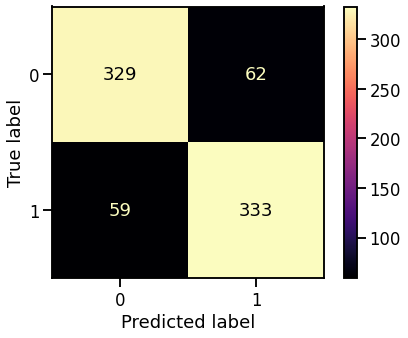

In [122]:
plot_confusion_matrix(clf_xgb, x_test, y_test, cmap="magma");